In [31]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

In [32]:
optim_idx = 14
result_path = Path(f"../data/optim/optim_{optim_idx}.txt")

In [33]:
def read_results(results_path: Path) -> tuple:
    with open(results_path, 'r') as f:
        lines = f.readlines()
    
    train_losses = None
    test_losses = None

    for i, line in enumerate(lines):
        if line.strip() == "Best trial train losses:":
        # Next line contains the values
            values = lines[i+1].strip().split('\t')
            train_losses = np.array([float(v) for v in values if v])
        elif line.strip() == "Best trial test losses:":
        # Next line contains the values
            values = lines[i+1].strip().split('\t')
            test_losses = np.array([float(v) for v in values if v])
        
    if train_losses is None or test_losses is None:
        raise ValueError("Could not find train or test losses in the results file.")
    return train_losses, test_losses

In [34]:
train_losses, test_losses = read_results(result_path)

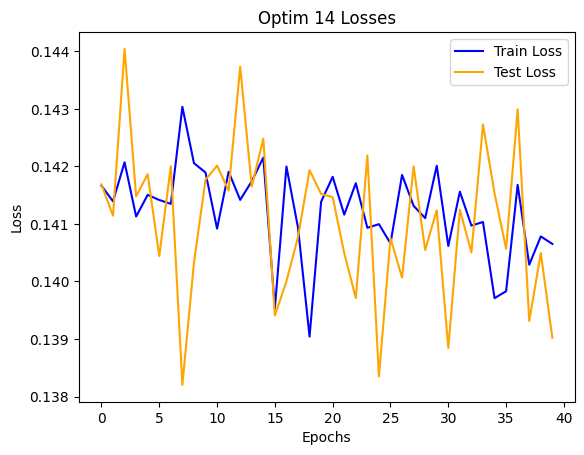

In [35]:
plt.plot(train_losses, label='Train Loss', color='blue')
plt.plot(test_losses, label='Test Loss', color='orange')
plt.title(f"Optim {optim_idx} Losses")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()